## 크롤링된 기사 가져오기

In [22]:
import pandas as pd
file_path = '수도권_아파트_청약_뉴스_크롤링_청약기간내.csv'
df = pd.read_csv(file_path)
df.head()

,공고번호,apartment,title,content,url
0,2025000043,부천 JY 포에시아,'안동용상하늘채리버스카이' 등 1205가구 분양예정[분양캘린더],견본주택 '용현우방아이유쉘센트럴마린' 개관[서울=뉴시스][서울=뉴시스]정진형 기자 ...,https://n.news.naver.com/mnews/article/003/001...
1,2025000043,부천 JY 포에시아,다음 주 전국 분양물량 1205가구에 그쳐…서울은 '無',다음 주 분양 물량이 전주의 절반에도 미치지 못하는 1200여가구에 그칠 것으로 보...,https://n.news.naver.com/mnews/article/277/000...
2,2025000043,부천 JY 포에시아,분양 성수기인데…내주 전국서 1205가구 공급 그쳐,부동산R114 주간 부동산 분양 캘린더봄철 분양 성수기에도 분양 시장은 침체기가 이...,https://n.news.naver.com/mnews/article/015/000...
3,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),"3월 첫째주, 전국 2334가구 청약…지방 물량 집중",전국 6곳 청약 접수서울·인천 수도권 2곳3월 첫째 주 전국 6곳에서 총 2334가...,https://n.news.naver.com/mnews/article/277/000...
4,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),[주간분양] 수도권 청약 물량 희귀…전국 2334가구 중 35가구,전국 6곳 중 4곳이 지방…2299가구 공급28일 리얼투데이에 따르면 3월 첫째 주...,https://n.news.naver.com/mnews/article/119/000...


## 텍스트 전처리
- 불용어 정제
- 텍스트 정제
- 명사 추출: Okt, Hannanum, ...

In [23]:
import re
from konlpy.tag import Okt

# 형태소 분석기 설정
okt = Okt()

# 불용어 정리
with open('stopwords-ko.txt', 'r') as f:
  list_file = f.readlines() 
stopwords_default = [word[:-1] for word in list_file ]
stopwords_default
stopwords = stopwords_default # 기본

# 1. 텍스트 정제 함수 (특수문자, 숫자 제거)
def clean_text(text):
    text = re.sub(r'\([^)]*\)', '', text)  # 괄호 안 내용 제거
    text = re.sub(r'[^가-힣\s]', '', text)  # 한글과 공백 제외 문자 제거
    text = re.sub(r'\s+', ' ', text).strip()  # 연속 공백 제거
    return text

# 2. 형태소 분석을 통한 명사 추출 함수
def extract_nouns(text):
    nouns = okt.nouns(text)  # 형태소만 추출
    nouns = [word for word in nouns if word not in stopwords and len(word) > 1]  # 불용어 제거 및 한 글자 단어 제외
    return ' '.join(nouns)

# 3. 전체 데이터 전처리
corpus = df['content'].tolist()
cleaned_corpus = [extract_nouns(clean_text(text)) for text in corpus]  # 정제 + 명사 추출

In [24]:
# 전처리된 텍스트 확인

cleaned_corpus[:3]

['견본주택 우방 아이유 센트럴 마린 개관 서울 뉴시스 서울 뉴시스 정진 기자 부동산 둘째 전국 가구 분양 시작 일반 분양 물량 청약 접수 경기 부천시 심곡동 부천 시아 경북 안동시 용상동 안동 용상 하늘 리버 스카이 울산 울주군 삼남 울산 피트 스타 시티 진행 모델하우스 인천 미추홀 용현동 우방 아이유 센트럴 마린 개관 코오롱 글로벌 경북 안동시 용상동 일원 안동 용상 하늘 리버 스카이 분양 지하 지상 최고 전용 면적 가구 규모 경동로 통한 안동 내외 이동 용상 교리 국도 비롯 용상 안동 외곽순환 도로 교차로 개통 교통 여건 개선 전망 선어 생태 공원 낙천 공원 낙동강 자연환경 동다 목적 체육관 안동 문화 관광 자리 생활 편의 스틸 경남 기업 인천 미추홀 용현동 일원 아파트 주택 재건축 통해 주상 복합 아파트 우방 아이유 센트럴 마린 분양 예정 지하 지상 최고 전용 면적 가구 아파트 가구 일반 수인 분당선 숭의역 이용 경인 고속도로 수도권 순환 고속도로 광역 교통 신선 신흥 신흥 여중 학교 인하대병원 옹진군 대형 마트 기반 시설 인접',
 '분양 물량 전주 절반 가구 부동산 전국 가구 분양 전주 가구 비교 감소 수치 서울 분양 물량 지난달 래미안 원페를 공급 마지막 일반 분양 물량 공급 예정 경기 부천시 심곡동 부천 시아 경북 안동시 용상동 안동 용상 하늘 리버 스카이 울산 울주군 삼남 울산 피트 스타 시티 부동산 계획 분양 물량 일부 건설 미분 우려 분양 일정 조정 청약 온기 기대 확산',
 '부동산 주간 부동산 분양 캘린더 봄철 분양 수기 분양 시장 침체 내주 공급물량 가구 전망 부동산 내주 전국 가구 가구 절반 수준 지난해 한주 최대 가구 공급 기도 일반 분양 수기 서울 제외 지역 청약 경쟁률 정치 불확실 성과 경기 침체 지속 전반 청약 심리 위축 공급 물량 감소 분석 서울 분양 물량 서울 지난달 첫째 래미안 원페를 공급 마지막 일반 분양 물량 상황 지속 공급 경기 부천시 원미구 심곡동 부천 시아 경북 안동시 용상동 안동 용상 하늘 리버 스카이 울산 울

## DTM (Document Term Matrix) 만들기
- DTM
  - 각 문장 마다 등장한 단어의 횟수를 행렬로 만듬
- Vectorizer
  - max_df: 전체 문서의 ~ 이상 등장한 단어 제외 (너무 일반적인 단어 제외)
  - min_df: 최소 ~ 개 이상 문서에서 단어가 등장해야 포함
  - max_features: 최대 단어 개수
  - ngram_range
  - token_pattern

In [25]:
# CountVectorizer로 전처리한 기사 텍스트를 빈도수 기반 단어 추출

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    max_df=0.8,  # 전체 문서의 80% 이상 등장한 단어 제외
    min_df=20,    # Minimum Document Frequency, 최소 문서 빈도 = min_df=5면 최소 5개 문서에서 등장해야 포함됨
    max_features=3000,
    ngram_range=(1, 3),  # unigram + bigram + trigram 사용
    token_pattern=r'\b\w+\b'  # 숫자 포함 단어도 추출 가능
)

dtm = vectorizer.fit_transform(cleaned_corpus)  # 전처리된 데이터로 DTM 생성
dtm.shape

(1953, 3000)

In [26]:
# 추출된 단어 리스트 출력

words = vectorizer.get_feature_names_out()
print("✅ 추출된 키워드 목록:", words[:1000])

✅ 추출된 키워드 목록: ['가가' '가가 만원' '가가 억만원' '가가 억원' '가가 책정' '가격' '가격 경쟁력' '가격 공개' '가격 공개 뉴시스'
 '가격 공급' '가격 분양' '가격 상승' '가구 가구' '가구 가구 가구' '가구 가구 구성' '가구 가구 분양'
 '가구 가구 일반' '가구 가운데' '가구 공급' '가구 공급 청약' '가구 구성' '가구 규모' '가구 규모 가구'
 '가구 규모 전용' '가구 규모 조성' '가구 대규모' '가구 대한' '가구 모집' '가구 모집 가구' '가구 모집 건의'
 '가구 모집 경쟁률' '가구 모집 몰리' '가구 모집 순위' '가구 모집 신청' '가구 모집 접수' '가구 모집 지원'
 '가구 모집 천명' '가구 모집 청약' '가구 모집 평균' '가구 미달' '가구 분양' '가구 분양 시작' '가구 분양 예정'
 '가구 블록' '가구 순위' '가구 순위 청약' '가구 아파트' '가구 오피스텔' '가구 일반' '가구 일반 분양' '가구 전용'
 '가구 전용 면적' '가구 조성' '가구 청약' '가구 청약 접수' '가구 타입' '가구 특별' '가구 특별 공급' '가까이'
 '가능' '가능성' '가도' '가든' '가량' '가로' '가로 공급' '가운데' '가운데 가구' '가의' '가입' '가입 기간'
 '가입 기간 개월' '가입자' '가장' '가장 경쟁률' '가장 청약' '가재' '가점' '가점 기록' '가점 당첨' '가점 만점'
 '가점 전용' '가점 주택' '가점 청약' '가점 최고' '가점 최저' '가점 추첨' '가점 통장' '가족' '가지' '가치'
 '가평' '가평군' '간선' '간선 도로' '갈수록' '감소' '감안' '감염' '감염증' '감일' '감정' '감정 청약'
 '감정 청약 전날' '강남' '강남 분대' '강남구' '강동' '강동구' '강변' '강북' '강북구' '강북구 미아동' '강서구'
 '강선' '강원' '강일' '강점' '강화' '개관' '개관 본격' '개관 본격 분양' '개교' '개동' '

## LDA 학습
- Document Term Matrix에서 문서 별 토픽 분포와 토픽 별 단어 분포를 찾아가는 기법입니다.
- LatentDirichletAllocation
  - n_components: 토픽 개수
  - doc_topic_prior: 작을수록 하나의 문서가 소수의 토픽에 집중됨 (0~1, 기본값: 0.3)
  - topic_word_prior: 작을수록 하나의 토픽이 적은 단어를 집중적으로 포함 (0~1, 기본값: 1 / n_components)

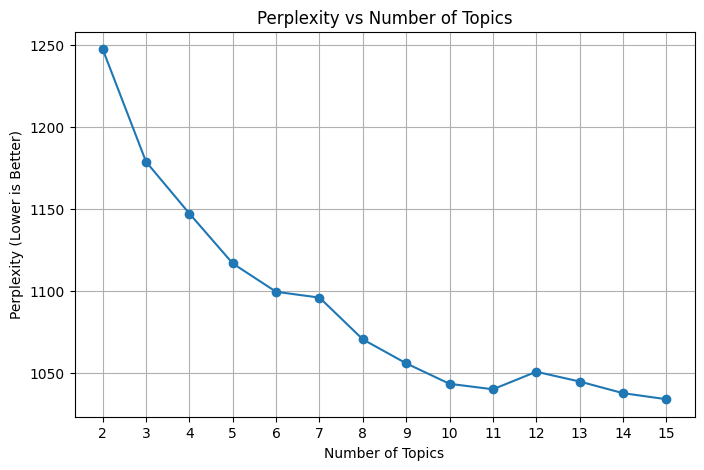

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

import re
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

# 2. 최적 토픽 개수 찾기
perplexities = []
topic_range = range(2, 16)  # 토픽 개수 2개 ~ 16개 테스트

for n_topics in topic_range:
    lda = LatentDirichletAllocation(
        n_components=n_topics, 
        doc_topic_prior=0.3,
        # topic_word_prior=0.01,
        max_iter=10,  # 충분한 학습 횟수
        learning_method='batch',  # 안정적인 batch 학습
        random_state=42,
        n_jobs=-1  # 병렬 처리
    )
    lda.fit(dtm)
    perplexities.append(lda.perplexity(dtm))  # perplexity 저장

# 3. Perplexity 시각화
plt.figure(figsize=(8, 5))
plt.plot(topic_range, perplexities, marker='o', linestyle='-')
plt.title('Perplexity vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity (Lower is Better)')
plt.xticks(topic_range)
plt.grid()
plt.show()


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import pprint

# 1. LDA 모델 학습 (n_components=9로 설정)
lda = LatentDirichletAllocation(
    n_components=9, 
    doc_topic_prior=0.1, 
    random_state=42
)
lda.fit(dtm)

# 2. 토픽별 주요 키워드 출력
topic_names = [f'토픽 {i}' for i in range(1, 10)] 

terms = vectorizer.get_feature_names_out()
topic_keywords = {}

for i, topic in enumerate(lda.components_):
    top_keywords = [terms[j] for j in topic.argsort()[-10:][::-1]]  # 상위 10개 키워드 (역순 정렬)
    topic_keywords[topic_names[i]] = top_keywords

# 3. 기사별 주요 토픽 점수 출력 (DataFrame 활용)
doc_topic = lda.transform(dtm)

results = []
for i, topic_dist in enumerate(doc_topic):
    top_topic = topic_dist.argmax()
    result = {
        '기사 번호': i + 1,
        '주요 토픽': topic_names[top_topic],
    }
    result.update({topic_names[j]: round(topic_dist[j], 4) for j in range(len(topic_names))})  # 소수점 4자리 반올림
    results.append(result)

df_results = pd.DataFrame(results)

# 4. 결과 출력
print("\n[토픽별 주요 키워드]")
pprint.pprint(topic_keywords)



[토픽별 주요 키워드]
{'토픽 1': ['경쟁률',
          '모집',
          '기록',
          '가구 모집',
          '서울',
          '평균',
          '경쟁률 기록',
          '순위 청약',
          '평균 경쟁률',
          '접수'],
 '토픽 2': ['지역', '아파트', '수도권', '건설', '규제', '서울', '세대', '시장', '부동산', '경쟁률'],
 '토픽 3': ['대출', '주택', '규제', '중도', '지역', '아파트', '이자', '계약금', '혜택', '포천'],
 '토픽 4': ['가점', '당첨', '서울', '주택', '통장', '평균', '최고', '아파트', '지역', '기간'],
 '토픽 5': ['아파트', '가격', '억원', '가가', '분양 가가', '억만원', '시세', '상승', '시장', '주택'],
 '토픽 6': ['평택', '아파트', '부동산', '시장', '시티', '지역', '반도체', '평택시', '지제역', '신도시'],
 '토픽 7': ['지상', '지하', '접수', '지하 지상', '경기', '면적', '전용 면적', '청약 접수', '예정', '규모'],
 '토픽 8': ['세대', '예정', '시설', '당첨', '조성', '위치', '진행', '면적', '발표', '공원'],
 '토픽 9': ['경쟁률', '뉴시스', '접수', '지역', '평균', '특별 공급', '모집', '특별', '순위 청약', '동탄']}


토픽 해석
- 토픽1: 경쟁률
- 토픽2: 부동산, 건설, 규제
- 토픽3: 대출, 이자, 계약금
- 토픽4: 당첨가점
- 토픽5: 분양가격, 시세
- 토픽6: 신도시
- 토픽7: ?
- 토픽8: 주거환경
- 토픽9: 특별 공급, 순위 청약

In [30]:
import pandas as pd

# 기사별 주요 토픽 점수 출력
doc_topic = lda.transform(dtm)

# 토픽 이름 설정
topic_names = [f'토픽 {i}' for i in range(1, 10)] 

# 기사별 토픽 비율 정리 (테이블 형식)
topic_df = pd.DataFrame(doc_topic, columns=topic_names)
topic_df.insert(0, '기사 번호', range(1, len(topic_df) + 1))

# 주요 토픽 추가
topic_df['주요 토픽'] = topic_df[topic_names].idxmax(axis=1)

# 결과 출력 (테이블 형식)
topic_df.head(20)


,기사 번호,토픽 1,토픽 2,토픽 3,토픽 4,토픽 5,토픽 6,토픽 7,토픽 8,토픽 9,주요 토픽
0,1,0.000575,0.000575,0.000575,0.000575,0.000575,0.000575,0.799620,0.196355,0.000575,토픽 7
1,2,0.001789,0.305662,0.001789,0.001789,0.001789,0.001790,0.681813,0.001789,0.001789,토픽 7
2,3,0.000991,0.424334,0.000991,0.000991,0.000991,0.063290,0.506429,0.000991,0.000991,토픽 7
3,4,0.057287,0.000633,0.000633,0.000633,0.000633,0.078110,0.860802,0.000633,0.000633,토픽 7
4,5,0.000403,0.000403,0.000403,0.000403,0.000403,0.000403,0.996772,0.000404,0.000403,토픽 7
5,6,0.000414,0.000413,0.081304,0.000413,0.000414,0.000414,0.915802,0.000413,0.000413,토픽 7
6,7,0.000559,0.000559,0.000559,0.962508,0.000559,0.000559,0.033579,0.000559,0.000559,토픽 4
7,8,0.144659,0.000690,0.010081,0.841118,0.000690,0.000690,0.000690,0.000690,0.000690,토픽 4
8,9,0.097845,0.000273,0.000273,0.871649,0.000273,0.000273,0.028866,0.000273,0.000273,토픽 4
9,10,0.000848,0.524279,0.000848,0.000848,0.124341,0.000848,0.346290,0.000848,0.000848,토픽 2


<Axes: xlabel='count', ylabel='주요 토픽'>

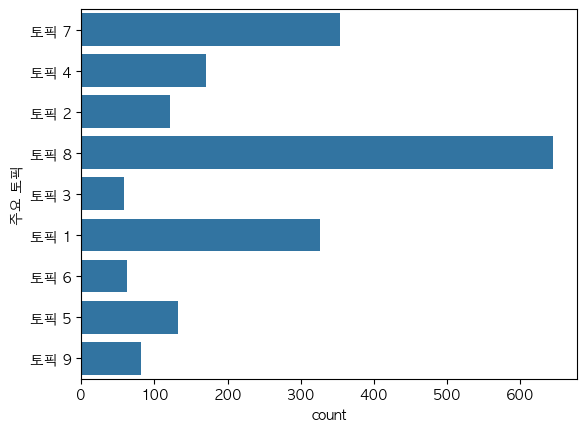

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] =False

sns.countplot(topic_df['주요 토픽'])

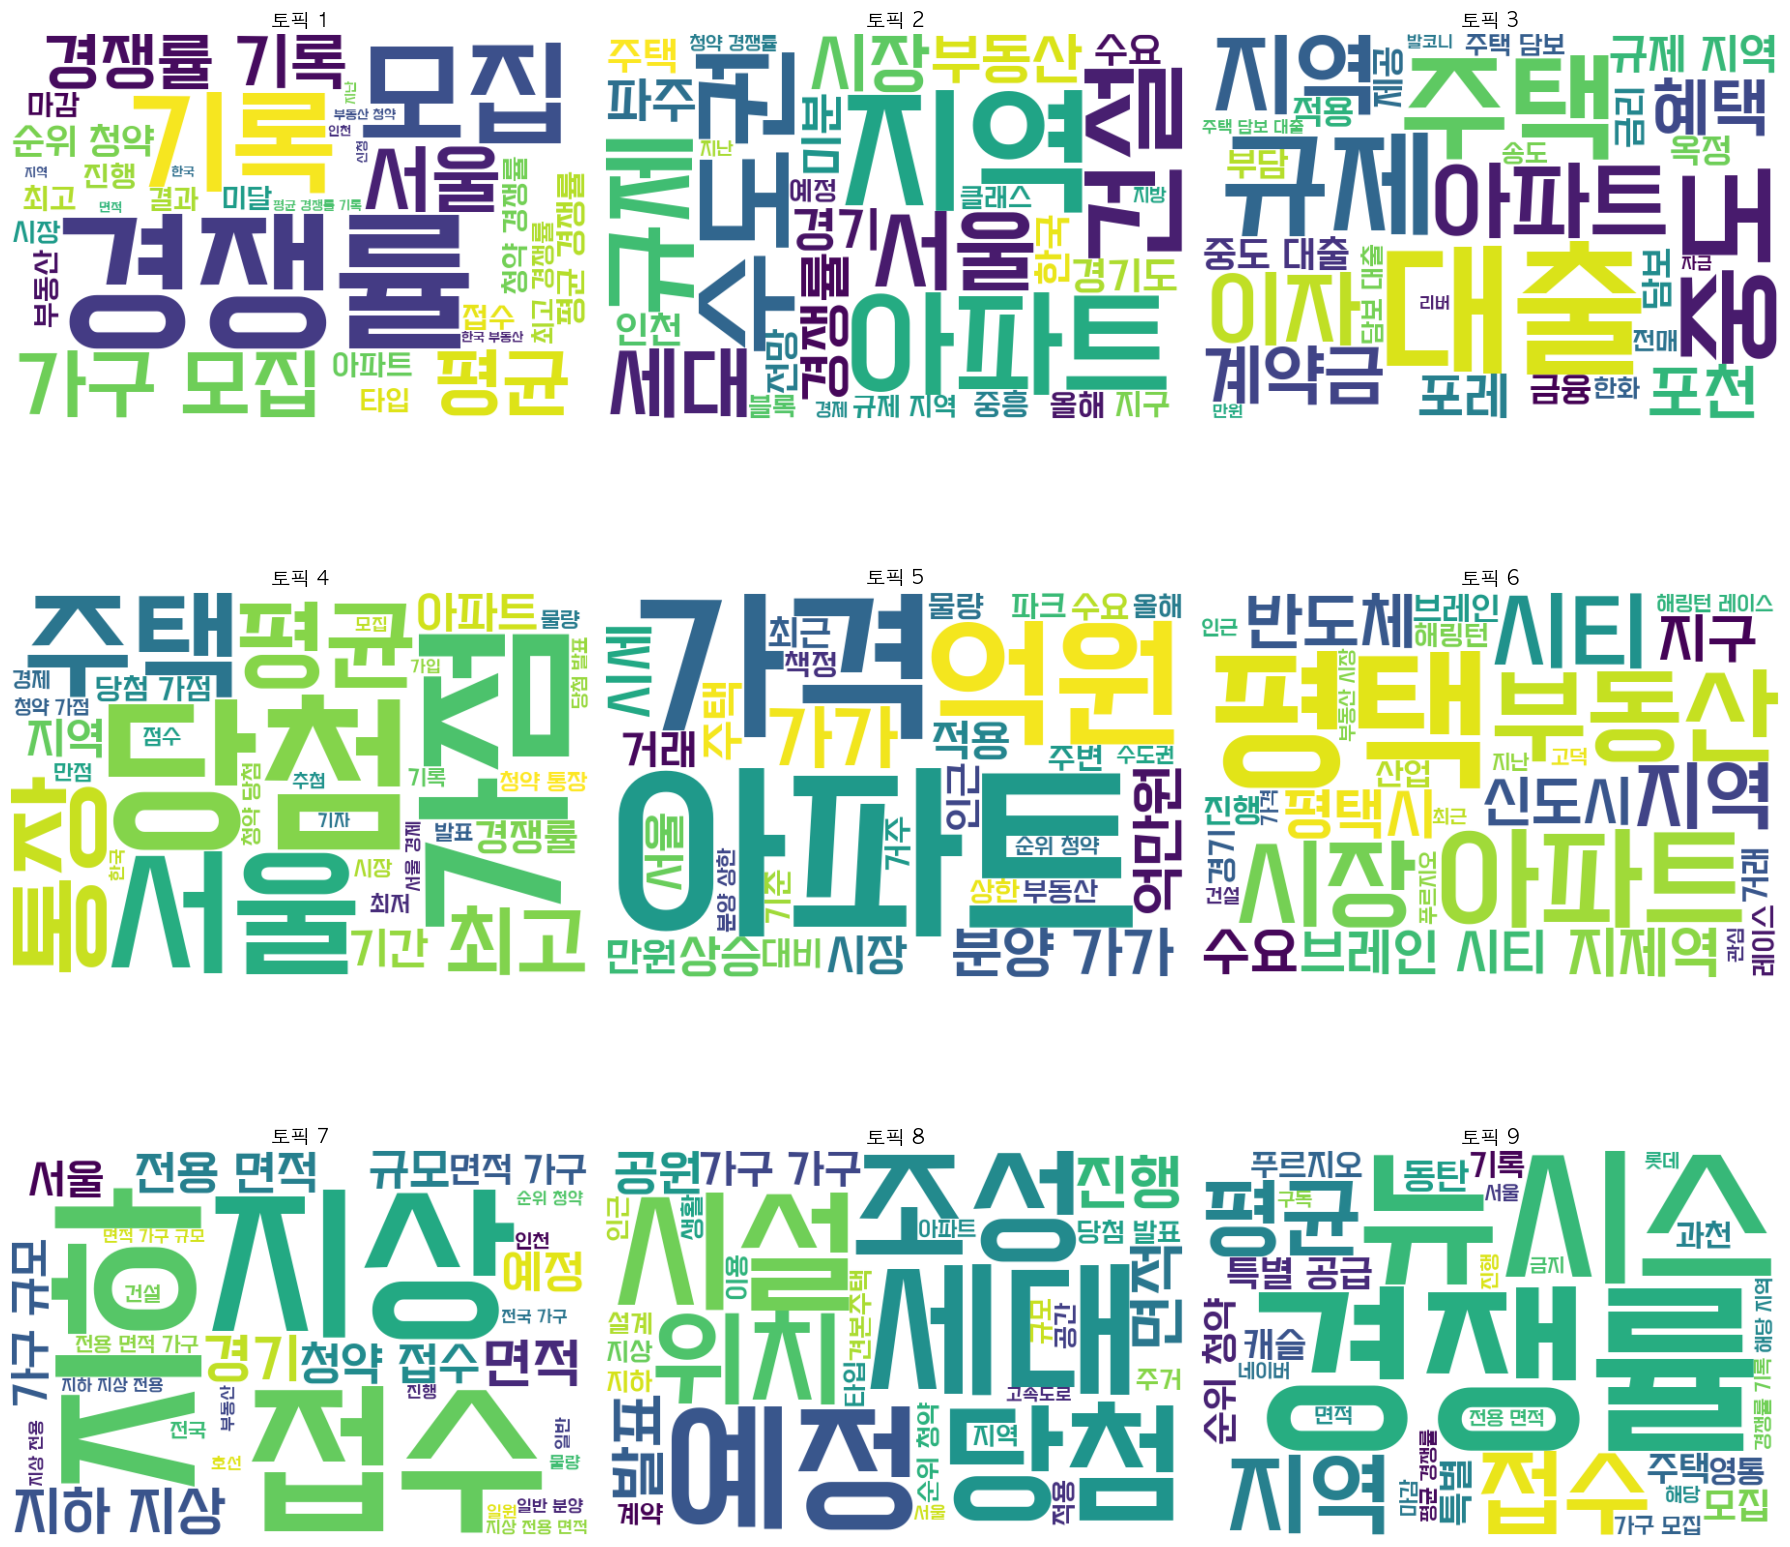

In [ ]:
from wordcloud import WordCloud

# 피처 네임 (단어 목록)
feature_names = vectorizer.get_feature_names_out()

# 워드 클라우드 시각화 함수
def plot_wordcloud(lda_model, feature_names, topic_idx, ax):
    """ 특정 토픽에 대한 워드 클라우드를 그리는 함수 """
    topic = lda_model.components_[topic_idx]  # 토픽별 단어 가중치
    word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-30 - 1:-1]}  # 상위 30개 단어
    
    wordcloud = WordCloud(
        font_path = '/Library/Fonts/Y 너만을 비춤체.ttf',
        width=600, height=400, background_color='white'
    ).generate_from_frequencies(word_freq)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"토픽 {topic_idx + 1}", fontsize=14)
    ax.axis('off')

# 모든 토픽에 대한 워드 클라우드 출력
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # 2x2 서브플롯 (토픽 개수에 맞게 조절)
axes = axes.flatten()

for i in range(9):
    plot_wordcloud(lda, feature_names, i, axes[i])

plt.tight_layout()
plt.show()